# Tarea 1: Unsupervised learning

Integrantes:

Roberto Mendoza Matos 

Santiago Soltelo

Benites


Trabajo elaborado por: Santiago Sotelo, Sebastián Benites, Roberto Mendoza

### R plug-in

In [ ]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


## Ejercicio 1
Generar una base de datos simulada con 60 observaciones y 50 atributos (usar la función rnorm() para generar la base de datos):

### a) Realizar PCA en las 60 observaciones.

In [ ]:
%%R
set.seed(13569)

x = matrix(rnorm(60*50), ncol=50)


### b) Graficar las 2 primeras componentes principales

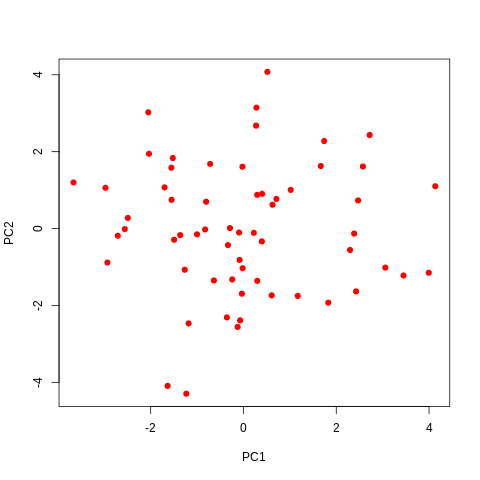

In [ ]:
%%R
componentes = prcomp(x, scale=TRUE)

componentes$x

plot(componentes$x, pch =20, cex =1.5, col = 'red')

### c) Mostrar el porcentaje de información contenida en cada componente principal

In [ ]:
%%R
com_var = componentes$sdev^2

fr_var = 100*com_var/sum(com_var)

fr_var

varianza = matrix(nrow = 50, ncol = 2)

for (j in 1 : 50){
    varianza[j,1] = paste("PCA", j)
    varianza[j,2] = fr_var[j]
}

varianzas = data.frame(varianza)


       X1                 X2
1   PCA 1   6.41956759308838
2   PCA 2   5.84069079792425
3   PCA 3   5.40274597304342
4   PCA 4   5.23535301255004
5   PCA 5     4.892435845263
6   PCA 6   4.62228658956913
7   PCA 7   4.40915694986443
8   PCA 8   4.28377747624674
9   PCA 9   4.08191340276644
10 PCA 10   3.94472013900434
11 PCA 11   3.63490433370782
12 PCA 12   3.52161470291915
13 PCA 13   3.07821590219841
14 PCA 14   3.01077820663185
15 PCA 15   2.88961763664673
16 PCA 16    2.7343754097957
17 PCA 17   2.54538334251971
18 PCA 18   2.31357157372343
19 PCA 19   2.24588011761079
20 PCA 20   2.18868573062681
21 PCA 21   2.04131896300697
22 PCA 22   1.93198912820708
23 PCA 23   1.73387864349372
24 PCA 24   1.63467571033549
25 PCA 25   1.48730840762373
26 PCA 26   1.37221966074312
27 PCA 27   1.31394990689763
28 PCA 28   1.19101194176621
29 PCA 29   1.10256519595481
30 PCA 30   1.03043569260503
31 PCA 31  0.970841763159638
32 PCA 32  0.925802916277947
33 PCA 33  0.846682540961387
34 PCA 34  0.7

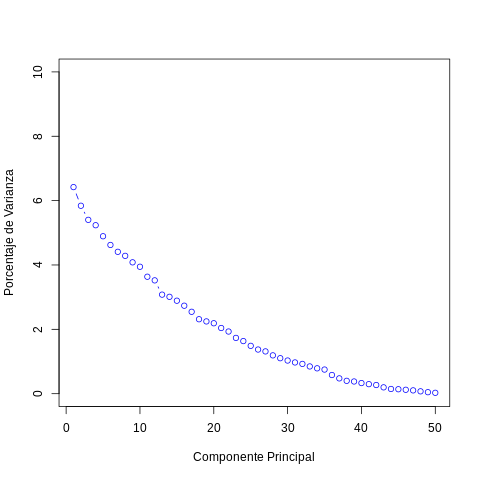

In [ ]:
%%R
plot(fr_var, xlab="Componente Principal", ylab="Porcentaje de Varianza", ylim=c(0,10), type='b', col = "blue")

### d) Mostrar el porcentaje acumulado de información.

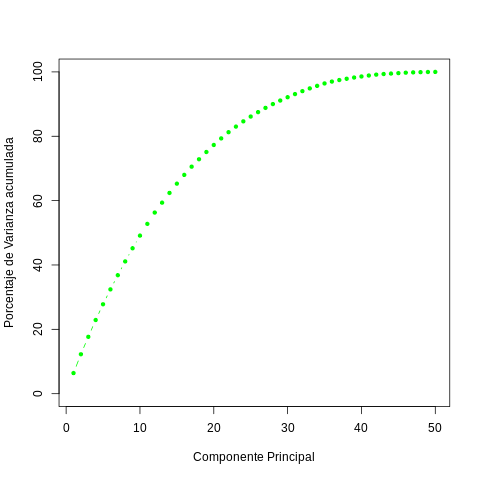

In [ ]:
%%R
plot(cumsum(fr_var), xlab="Componente Principal", ylab="Porcentaje de Varianza acumulada", ylim=c(0,100), type='b', pch =20, col = "green")


## Ejercicio 2
1. Dadas las siguientes observaciones:

In [ ]:
%%R
z <- matrix(c(1,1,0,5,6,4,4,3,4,1,2,0), ncol=2)
z

     [,1] [,2]
[1,]    1    4
[2,]    1    3
[3,]    0    4
[4,]    5    1
[5,]    6    2
[6,]    4    0


###a) Graficar las observaciones.

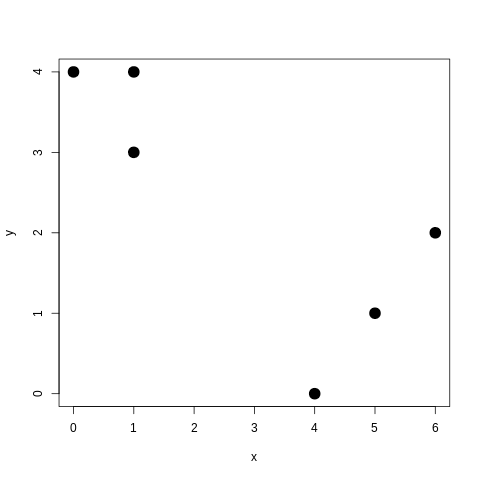

In [ ]:
%%R
plot(z, xlab="x", ylab="y", pch=20, cex=3)

### b) Realizar k-means con k=2.


In [ ]:
%%R

km.out <- kmeans(z, 2, nstart=200)
km.out

K-means clustering with 2 clusters of sizes 3, 3

Cluster means:
       [,1]     [,2]
1 0.6666667 3.666667
2 5.0000000 1.000000

Clustering vector:
[1] 1 1 1 2 2 2

Within cluster sum of squares by cluster:
[1] 1.333333 4.000000
 (between_SS / total_SS =  87.9 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      


###c) Graficar las observaciones asignado un color para cada cluster.

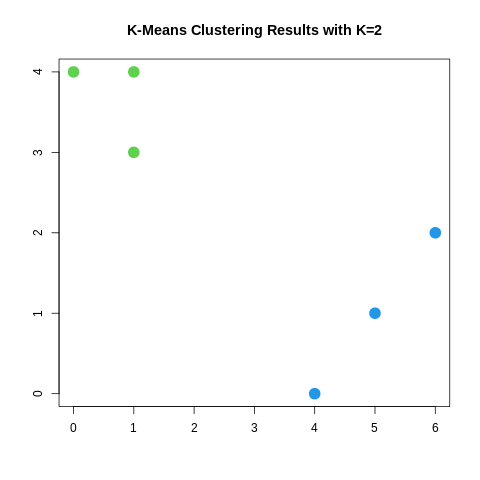

In [ ]:
%%R
plot(z, col =(km.out$cluster+2) , main ="K-Means Clustering Results with K=2", xlab ="", ylab ="", pch =20, cex =3)#más 1 para que use otro color.

###d) Realizar k-means con k-means con k=5 y variar el método para la distancia: euclidean, maximum, manhattan, canberra, pearson, correlation, spearman, kendall.

####Instalar paquete amap

In [ ]:

%%R
install.packages("amap")
library(amap)

####Método euclidean

In [ ]:
%%R
euclidean<- Kmeans(z, 5, nstart = 20, method="euclidean")
print("euclidean method")
euclidean


[1] "euclidean method"
K-means clustering with 5 clusters of sizes 1, 1, 1, 1, 2

Cluster means:
  [,1] [,2]
1    0  4.0
2    5  1.0
3    4  0.0
4    6  2.0
5    1  3.5

Clustering vector:
[1] 5 5 1 2 4 3

Within cluster sum of squares by cluster:
[1] 0.00 0.00 0.00 0.00 0.25

Available components:

[1] "cluster"  "centers"  "withinss" "size"    


####Método maximum

In [ ]:
%%R
maximum<- Kmeans(z, 5, nstart = 20, method= "maximum")
print("maximum method")
maximum

[1] "maximum method"
K-means clustering with 5 clusters of sizes 1, 1, 2, 1, 1

Cluster means:
  [,1] [,2]
1  4.0  0.0
2  1.0  3.0
3  5.5  1.5
4  0.0  4.0
5  1.0  4.0

Clustering vector:
[1] 5 2 4 3 3 1

Within cluster sum of squares by cluster:
[1] 0.00 0.00 0.25 0.00 0.00

Available components:

[1] "cluster"  "centers"  "withinss" "size"    


####Método Manhattan

In [ ]:
%%R
manhattan <- Kmeans(z, 5, nstart = 20, method="manhattan")
print("manhattan method")
manhattan

[1] "manhattan method"
K-means clustering with 5 clusters of sizes 1, 1, 1, 2, 1

Cluster means:
  [,1] [,2]
1  6.0    2
2  4.0    0
3  1.0    3
4  0.5    4
5  5.0    1

Clustering vector:
[1] 4 3 4 5 1 2

Within cluster sum of squares by cluster:
[1] 0.00 0.00 0.00 0.25 0.00

Available components:

[1] "cluster"  "centers"  "withinss" "size"    


####Método Canberra

In [ ]:
%%R
canberra <- Kmeans(z, 5, nstart = 20, method="canberra")
print("canberra method")
canberra

[1] "canberra method"
K-means clustering with 5 clusters of sizes 2, 1, 1, 1, 1

Cluster means:
  [,1] [,2]
1    1  3.5
2    6  2.0
3    0  4.0
4    5  1.0
5    4  0.0

Clustering vector:
[1] 1 1 3 4 2 5

Within cluster sum of squares by cluster:
[1] 0.00591716 0.00000000 0.00000000 0.00000000 0.00000000

Available components:

[1] "cluster"  "centers"  "withinss" "size"    


####Método Pearson

In [ ]:
%%R
pearson <- Kmeans(z, 5, nstart = 20, method="pearson")
print("pearson method")
pearson

[1] "pearson method"
K-means clustering with 5 clusters of sizes 1, 1, 1, 1, 2

Cluster means:
  [,1] [,2]
1    0  4.0
2    5  1.0
3    6  2.0
4    4  0.0
5    1  3.5

Clustering vector:
[1] 5 5 1 2 3 4

Within cluster sum of squares by cluster:
[1] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 8.908371e-07

Available components:

[1] "cluster"  "centers"  "withinss" "size"    


####Método Correlation


In [ ]:
%%R
correlation <- Kmeans(z, 5, nstart = 20, method="correlation")
print("correlation method")
correlation

[1] "correlation method"
K-means clustering with 5 clusters of sizes 3, 0, 0, 3, 0

Cluster means:
       [,1]     [,2]
1 5.0000000 1.000000
2       NaN      NaN
3       NaN      NaN
4 0.6666667 3.666667
5       NaN      NaN

Clustering vector:
[1] 4 4 4 1 1 1

Within cluster sum of squares by cluster:
[1] 0 0 0 0 0

Available components:

[1] "cluster"  "centers"  "withinss" "size"    


####Método Spearman

In [ ]:
%%R
spearman <- Kmeans(z, 5, nstart = 20, method="spearman")
print("spearman method")
spearman

[1] "spearman method"
K-means clustering with 5 clusters of sizes 3, 0, 3, 0, 0

Cluster means:
       [,1]     [,2]
1 5.0000000 1.000000
2       NaN      NaN
3 0.6666667 3.666667
4       NaN      NaN
5       NaN      NaN

Clustering vector:
[1] 3 3 3 1 1 1

Within cluster sum of squares by cluster:
[1] 0 0 0 0 0

Available components:

[1] "cluster"  "centers"  "withinss" "size"    


####Método Kendall

In [ ]:
%%R
kendall <- Kmeans(z, 5, nstart = 20, method="kendall")
print("kendall method")
kendall

[1] "kendall method"
K-means clustering with 5 clusters of sizes 3, 3, 0, 0, 0

Cluster means:
       [,1]     [,2]
1 0.6666667 3.666667
2 5.0000000 1.000000
3       NaN      NaN
4       NaN      NaN
5       NaN      NaN

Clustering vector:
[1] 1 1 1 2 2 2

Within cluster sum of squares by cluster:
[1] 0 0 0 0 0

Available components:

[1] "cluster"  "centers"  "withinss" "size"    


###e) Comparar los resultados obtenidos usando los diferentes métodos para la distancia.

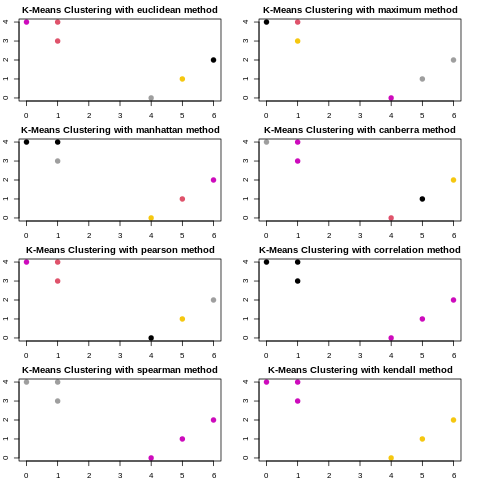

In [ ]:
%%R
par(mar=rep(2,4), mfrow=c(4,2))

#euclidean
plot(z, col =(euclidean$cluster+5) , main ="K-Means Clustering with euclidean method", xlab ="", ylab ="", pch =20, cex =2)

#Maximum
plot(z, col =(maximum$cluster+5) , main ="K-Means Clustering with maximum method", xlab ="", ylab ="", pch =20, cex =2)

#Manhattan
plot(z, col =(manhattan$cluster+5) , main ="K-Means Clustering with manhattan method", xlab ="", ylab ="", pch =20, cex =2)

#Canberra
plot(z, col =(canberra$cluster+5) , main ="K-Means Clustering with canberra method", xlab ="", ylab ="", pch =20, cex =2)

#Pearson
plot(z, col =(pearson$cluster+5) , main ="K-Means Clustering with pearson method", xlab ="", ylab ="", pch =20, cex =2)

#Correlation
plot(z, col =(correlation$cluster+5) , main ="K-Means Clustering with correlation method", xlab ="", ylab ="", pch =20, cex =2)

#Spearman
plot(z, col =(spearman$cluster+5) , main ="K-Means Clustering with spearman method", xlab ="", ylab ="", pch =20, cex =2)

#Kendall
plot(z, col =(kendall$cluster+5) , main ="K-Means Clustering with kendall method", xlab ="", ylab ="", pch =20, cex =2)

#Comparar gráficos? plots? multiple plots grid.
#En este caso será mejor analizar los gráficos y describir cómo cambian visualmente los clusters.
#Son 8, dos filas de 4.

Como podemos ver en los gráficos presentados, el método "Correlation", "Spearman" y "Kendall" coinciden en que son necesarios únicamente dos grupos para los datos, a diferencia de los otros métodos que sí destinan por lo menos un dato a cada uno de los 5 grupos.

### Ejercicio 3

In [ ]:
a) Realizar Hierarchical Clustering con los siguientes tipos de 𝑙𝑖𝑛𝑘𝑎𝑔𝑒: Complete, Single
y Average.

In [ ]:
%load_ext rpy2.ipython


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
%%R
USArrests

               Murder Assault UrbanPop Rape
Alabama          13.2     236       58 21.2
Alaska           10.0     263       48 44.5
Arizona           8.1     294       80 31.0
Arkansas          8.8     190       50 19.5
California        9.0     276       91 40.6
Colorado          7.9     204       78 38.7
Connecticut       3.3     110       77 11.1
Delaware          5.9     238       72 15.8
Florida          15.4     335       80 31.9
Georgia          17.4     211       60 25.8
Hawaii            5.3      46       83 20.2
Idaho             2.6     120       54 14.2
Illinois         10.4     249       83 24.0
Indiana           7.2     113       65 21.0
Iowa              2.2      56       57 11.3
Kansas            6.0     115       66 18.0
Kentucky          9.7     109       52 16.3
Louisiana        15.4     249       66 22.2
Maine             2.1      83       51  7.8
Maryland         11.3     300       67 27.8
Massachusetts     4.4     149       85 16.3
Michigan         12.1     255   

Primero vamos a escalar las observaciones y luego utilizar el HClust para los distintos tipos de linkage.

In [ ]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
%%R
hclust(dist(USArrests), method="complete")
#hclust(dist(USArrests), method="average")
#hclust(dist(USArrests), method="single")


Call:
hclust(d = dist(USArrests), method = "complete")

Cluster method   : complete 
Distance         : euclidean 
Number of objects: 50 



In [ ]:
%%R
#hclust(dist(USArrests), method="complete")
hclust(dist(USArrests), method="average")
#hclust(dist(USArrests), method="single")


Call:
hclust(d = dist(USArrests), method = "average")

Cluster method   : average 
Distance         : euclidean 
Number of objects: 50 



In [ ]:
%%R
#hclust(dist(USArrests), method="complete")
#hclust(dist(USArrests), method="average")
hclust(dist(USArrests), method="single")


Call:
hclust(d = dist(USArrests), method = "single")

Cluster method   : single 
Distance         : euclidean 
Number of objects: 50 



In [ ]:
b) Graficar los Dendrogramas para cada tipo de 𝑙𝑖𝑛𝑘𝑎𝑔𝑒.

SyntaxError: ignored

In [ ]:
#Creamos los objetos que vamos a graficar, según cada tipo de linkage. 
%%R
hc.complete = hclust(dist(USArrests), method="complete")
hc.average = hclust(dist(USArrests), method="average")
hc.single = hclust(dist(USArrests), method="single")

#Complete linkage

In [ ]:
%load_ext rpy2.ipython


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


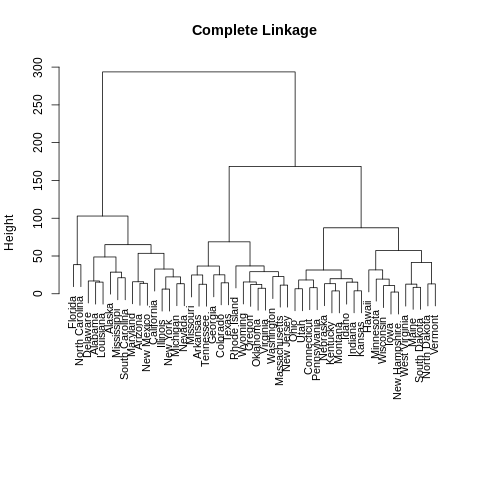

In [ ]:
%%R
plot(hc.complete, main="Complete Linkage", xlab="", sub="", cex=.9)

#Average Linkage

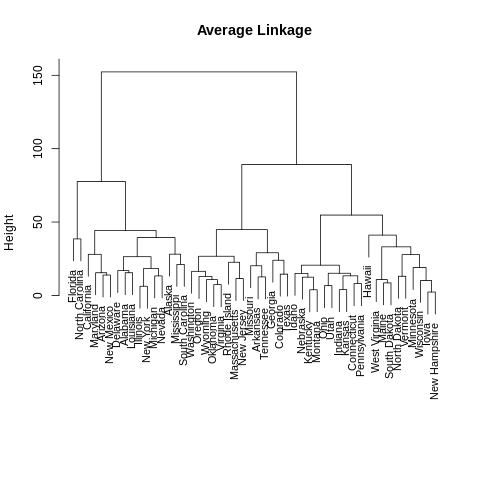

In [ ]:
%%R
plot(hc.average, main="Average Linkage", xlab="", sub="", cex=.9)

#Sinlge Linkage

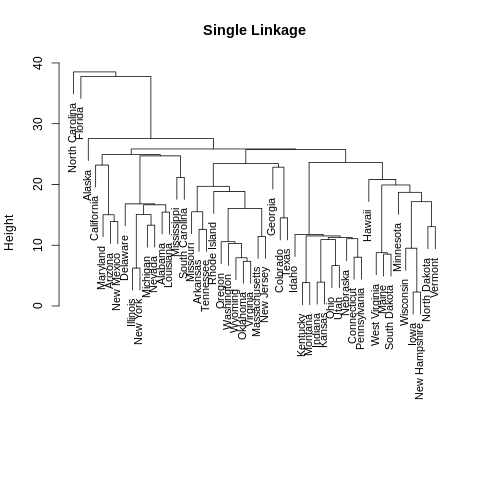

In [ ]:
%%R
plot(hc.single, main="Single Linkage", xlab="", sub="", cex=.9)

#C) Cortar los Dendrogramas a cierta altura para generar 3 clusters.

#Indico donde deberían realizarse los cortes en Complete linkage:

In [ ]:
%load_ext rpy2.ipython


/usr/local/lib/python3.7/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.7/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


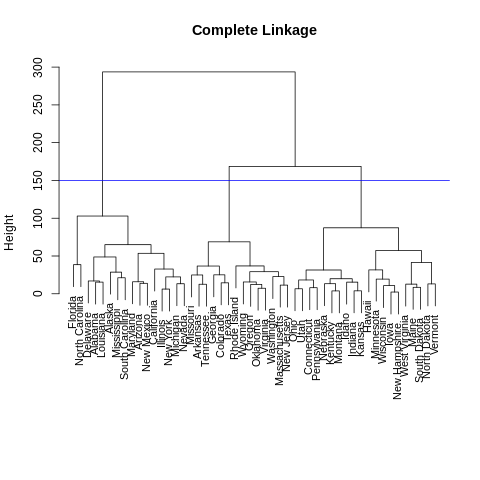

In [ ]:
%%R
plot(hc.complete, main="Complete Linkage", xlab="", sub="", cex=.9)
abline(h=150, col="blue")
     

#Indico donde deberían realizarse los cortes en Average linkage:

In [ ]:
%load_ext rpy2.ipython


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


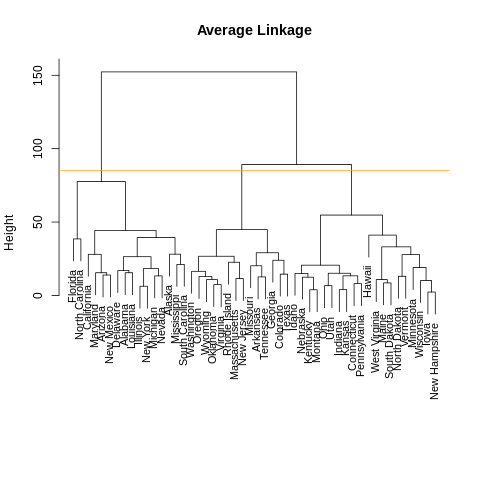

In [ ]:
%%R
plot(hc.average, main="Average Linkage", xlab="", sub="", cex=.9)
abline(h=85, col="orange")

#Indico donde deberían realizarse los cortes en Single linkage:

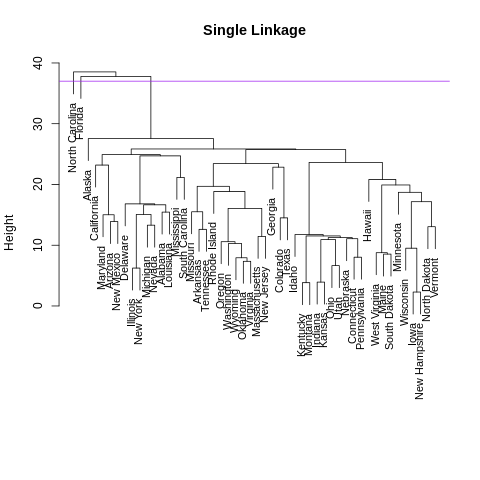

In [ ]:
%%R
plot(hc.single, main="Single Linkage", xlab="", sub="", cex=.9)
abline(h=37, col="purple")

###D) Mostrar que estados pertenecen a cada cluster.

In [ ]:
#Para el caso del tipo de linkage complete:

%%R
cutree(hc.complete, 3)

       Alabama         Alaska        Arizona       Arkansas     California 
             1              1              1              2              1 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              3              1              1              2 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              3              1              3              3 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              3              1              3              1 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             2              1              3              1              2 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             3              3              1              3              2 
    New Mexico       New York North Carolina   North Dakota           Ohio 
            

In [ ]:
#Para el caso de tipo de Average Linkage:

%%R
cutree(hc.average, 3)

       Alabama         Alaska        Arizona       Arkansas     California 
             1              1              1              2              1 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              3              1              1              2 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              3              1              3              3 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              3              1              3              1 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             2              1              3              1              2 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             3              3              1              3              2 
    New Mexico       New York North Carolina   North Dakota           Ohio 
            

In [ ]:
#Para el caso de tipo Single Linkage
%%R
cutree(hc.single, 3)

       Alabama         Alaska        Arizona       Arkansas     California 
             1              1              1              1              1 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             1              1              1              2              1 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             1              1              1              1              1 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             1              1              1              1              1 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             1              1              1              1              1 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             1              1              1              1              1 
    New Mexico       New York North Carolina   North Dakota           Ohio 
            